In [168]:
# Import
import numpy as np
import pandas as pd   
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [91]:
# Load preprocessed data
df = pd.read_csv("Data/data_pre.csv", index_col=0)

In [92]:
# Print head
df.head()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,OP_CARRIER_Frontier Airlines,OP_CARRIER_Hawaiian Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines
FL_DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2416,2059,2300.0,121.0,24.0,2324.0,112.0,8.0,2311,120.0,...,0,0,0,0,0,0,0,0,0,1
2018-01-01,2413,2114,2230.0,76.0,14.0,2244.0,123.0,5.0,15,128.0,...,0,0,0,0,0,0,0,0,0,1
2018-01-01,2412,653,747.0,54.0,14.0,801.0,1003.0,22.0,930,1025.0,...,0,0,0,0,0,0,0,0,0,1
2018-01-01,2411,1810,1922.0,72.0,16.0,1938.0,2157.0,4.0,2136,2201.0,...,0,0,0,0,0,0,0,0,0,1
2018-01-01,2410,1250,1337.0,47.0,12.0,1349.0,1600.0,6.0,1537,1606.0,...,0,0,0,0,0,0,0,0,0,1


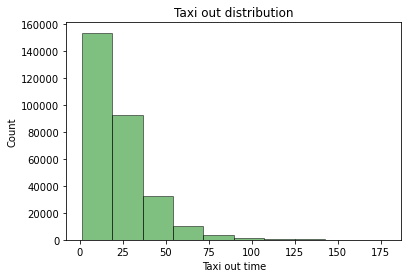

In [98]:
# Plot taxi out time
plt.hist(df["TAXI_OUT"], color='green', alpha=0.5, edgecolor='black')
plt.title('Taxi out distribution')
plt.xlabel('Taxi out time')
plt.ylabel('Count');

### Might follow a Gamma distribution?

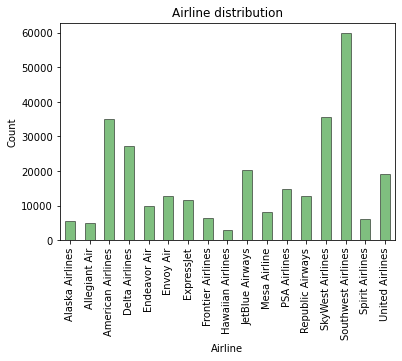

In [99]:
# Get all operators
df_ops = df.filter(regex='OP_CARRIER')
df_ops = df_ops.sum()[1:]

# Get labels
labs = []
lst_idx = list(df_ops.index)
for i in range(len(lst_idx)):
    labs.append(lst_idx[i].replace('OP_CARRIER_', ''))

# Set labels as index
df_ops = df_ops.set_axis(labs)
df_ops.plot.bar(color='green', alpha=0.5, edgecolor='black')
plt.title('Airline distribution')
plt.xlabel('Airline')
plt.ylabel('Count');

> We see that Soutwest, SkyWest, Delta and American Airlines are the most used airlines

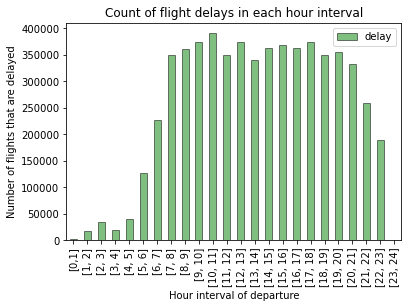

In [265]:
delays = df[['CARRIER_DELAY', 'DEP_TIME']].loc['2018-01-01':'2018-04-01']
delays['DEP_TIME'] = delays['DEP_TIME'].astype(int)
delays['DEP_TIME'] = pd.to_datetime(delays['DEP_TIME'], format="%H", exact = False).dt.hour # Convert to the hour we are in

# Group by delays
labels=["[0,1]", "[1, 2]", "[2, 3]", "[3, 4]", "[4, 5]", "[5, 6]",  "[6, 7]", "[7, 8]", "[8, 9]", "[9, 10]", "[10, 11]", "[11, 12]", "[12, 13]", "[13, 14]", "[14, 15]", "[15, 16]", "[16, 17]", "[17, 18]", "[18, 19]", "[19, 20]", "[20, 21]", "[21, 22]", "[22, 23]", "[23, 24]"] # labels
bins= np.arange(1,26) # intervals
X_dep = delays.copy() # Copy data frame
X_cut = pd.cut(delays['DEP_TIME'], bins=bins, labels=labels, right=False) # cut dataframe
X_dep['dep_group'] = X_cut # Add temp_group

# Create new data frame
cols = ['delay']
df_dep = pd.DataFrame(index=labels, columns=cols)

# take values
values = X_dep.groupby(['dep_group', 'CARRIER_DELAY']).size()


# Loop
for idx, t in enumerate(labels):
    # Assign total number of crimes
    df_dep.delay[idx] = X_dep[X_dep.dep_group == t]['CARRIER_DELAY'].sum()
    

# Add column and reset index
df_dep['dep_group'] = labels
df_dep = df_dep.reset_index().drop('index', axis=1)

# Plot the data frame in each group
df_dep.set_index('dep_group', inplace=True)
ax = df_dep.plot.bar(color='green', alpha=0.5, edgecolor='black')
ax.set_xlabel('Hour interval of departure')
ax.set_ylabel('Number of flights that are delayed')
ax.set_title('Count of flight delays in each hour interval');